In [1]:
import pandas as pd
meta = pd.read_csv('data/pub_filter.csv')
rel = pd.read_csv('data/pub_relation.csv')
pub = pd.read_csv('data/dist_pub.csv')
per = pd.read_csv('data/dist_per.csv')

Attach printing house

In [2]:
printing_df = pd.read_csv('data/printing_house.csv')

In [3]:
per_merge = pd.merge(per.iloc[:, 0:41], printing_df, how = 'left', on = 'ODIS_PERS_ID', )

In [4]:
per_merge.shape

(2081, 44)

In [5]:
houses_list = list(set([house for house in printing_df['Printing House'] if not str(house) == 'nan']))
houses_list.sort()

In [6]:
regex_list = ''
for i in range(0, len(houses_list)):
    if not i == len(houses_list) - 1:
        regex_list += f'{houses_list[i]}|'
    else:
        regex_list += f'{houses_list[i]}'

In [7]:
regex_list

'Auroy|Bardou|Bellère|Bogart|Borremans|Boscard|Cnobbaert|Diestre|Dieulot|Duhamel|English College Press|Fabri|Fowler|Galle|Henry|Kellam|Nutius|Pinchon|Plantin|Sarazin|Serrurier|Sleghers|Usselinx|Velpius|Verdussen|Wardavoir|Wyon|de Fampoux|de Spira|de Winde|van Wolsschaten'

Attach gender

In [8]:
women_df = pd.read_csv('data/women.csv')

In [9]:
per_merge = pd.merge(per_merge, women_df, how = 'left', on = 'ODIS_PERS_ID', )

In [10]:
per_merge.shape

(2081, 45)

In [11]:
per_merge.head()

,ODIS_PERS_ID,REL_PERS_REF_SURNAME,REL_PERS_REF_FIRST_NAME,Full Name,Birth Year,Birth Country,Birth Place,Death Year,Death Country,Death Place,...,1620s,1630s,1640s,1650s,Birth Region,Death Region,Printing House,House Origion,House Note,Gender
0,53546,de Loyola,Ignatius,Ignatius de Loyola,1491.0,NaN,NaN,1556.0,NaN,NaN,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,64493,Acx,Fernandus,Fernandus Acx,1839.0,Belgium,Pittem,NaN,NaN,NaN,...,1,3,0,0,Low Countries,NaN,NaN,NaN,NaN,NaN
2,77188,Perrenot de Granvelle,Antonius,Antonius Perrenot de Granvelle,1517.0,France,France,1586.0,Spain,Madrid,...,0,0,0,0,France,Iberian Union,NaN,NaN,NaN,NaN
3,77190,Boonen,Jacobus,Jacobus Boonen,1573.0,Belgium,Antwerpen,1655.0,Belgium,Brussel,...,2,2,0,0,Low Countries,Low Countries,NaN,NaN,NaN,NaN
4,94638,Malderus,Joannes,Joannes Malderus,1563.0,Belgium,Sint-Pieters-Leeuw,1633.0,Belgium,Antwerpen,...,1,0,0,0,Low Countries,Low Countries,NaN,NaN,NaN,NaN


Degree & betweenness centrality table

In [14]:
import networkx as nx

In [15]:
all_network_node = pd.read_csv('sna/data/people_node.csv')
all_network_edge = pd.read_csv('sna/data/people_edge.csv')

In [16]:
sna_cal = pd.read_csv('sna/data/people_cal.csv')

In [17]:
G = nx.Graph()
all_network_edge_list = [
        (all_network_edge['Source'][i], all_network_edge['Target'][i])
        for i in range(0, len(all_network_edge))
    ]
G.add_edges_from(all_network_edge_list)

In [18]:
degree_dict = nx.degree(G)
degree_cen_dict = nx.degree_centrality(G)
betweenness_dict = nx.betweenness_centrality(G)
eigenvector_dict = nx.eigenvector_centrality(G)
clustering_dict = nx.clustering(G)
closeness_dict = nx.closeness_centrality(G)

In [19]:
modularity_dict = sna_cal[['Id', 'modularity_class']].rename(columns = {'Id': 'ODIS_PERS_ID'})

In [20]:
degree_df = pd.DataFrame()
degree_df['ODIS_PERS_ID'] = [ID for ID in per['ODIS_PERS_ID'] if ID in G.nodes]
degree_df['Degree'] = [degree_dict[ID] for ID in degree_df['ODIS_PERS_ID']]
degree_df['Degree Centrality'] = [degree_cen_dict[ID] for ID in degree_df['ODIS_PERS_ID']]
degree_df['Eigenvector'] = [eigenvector_dict[ID] for ID in degree_df['ODIS_PERS_ID']]
degree_df['Clustering'] = [clustering_dict[ID] for ID in degree_df['ODIS_PERS_ID']]
degree_df['Closeness'] = [closeness_dict[ID] for ID in degree_df['ODIS_PERS_ID']]
degree_df['Betweenness'] = [betweenness_dict[ID] for ID in degree_df['ODIS_PERS_ID']]
degree_df = pd.merge(degree_df, modularity_dict, on = 'ODIS_PERS_ID')
degree_df = pd.merge(degree_df, per, on = 'ODIS_PERS_ID')

In [21]:
# degree_df.to_csv('per_degrees.csv', index = False)

Individuals

In [22]:
sort_degree_df = degree_df.sort_values('Degree', ascending = False).reset_index(drop = True)
sort_degree_df.head()

,ODIS_PERS_ID,Degree,Degree Centrality,Eigenvector,Clustering,Closeness,Betweenness,modularity_class,REL_PERS_REF_SURNAME,REL_PERS_REF_FIRST_NAME,...,1650s,Birth Region,Death Region,Printing House,House Origion,House Note,Gender,Most Involved Role,Most Involved Language,Most Involved Period
0,119268,585,0.283981,0.383811,0.012100,0.498546,0.312444,1,Bellère,Balthazar I,...,1,Low Countries,Low Countries,Bellère,Low Countries,founder,Male or Unspecified,printer/publisher,LATIN,1620s
1,119249,300,0.145631,0.177057,0.025596,0.409484,0.116537,10,Bogart,Jan I,...,0,NaN,Low Countries,Bogart,Low Countries,founder,Male or Unspecified,printer/publisher,LATIN,1590s
2,119785,282,0.136893,0.265731,0.040155,0.498789,0.132999,1,Colveneere,Georges,...,0,Low Countries,Low Countries,NaN,NaN,NaN,Male or Unspecified,approbator,FRENCH,1610s
3,119238,218,0.105825,0.049225,0.003509,0.406222,0.175220,9,De Roovere,Christine,...,0,NaN,NaN,Boscard,Low Countries,NaN,Female Pri/Pub,printer/publisher,LATIN,1600s
4,119288,211,0.102427,0.161423,0.035658,0.430208,0.089059,3,Auroy,Pierre,...,0,Low Countries,Low Countries,Auroy,Low Countries,founder,Male or Unspecified,printer/publisher,LATIN,1620s


In [23]:
sort_degree_df.head(30)[['ODIS_PERS_ID', 'Full Name', 'Eigenvector']]

,ODIS_PERS_ID,Full Name,Eigenvector
0,119268,Balthazar I Bellère,0.383811
1,119249,Jan I Bogart,0.177057
2,119785,Georges Colveneere,0.265731
3,119238,Christine De Roovere,0.049225
4,119288,Pierre Auroy,0.161423
5,120382,Martin Baes,0.215991
6,119313,Jean de Fampoux,0.066520
7,119285,Laurence II Kellam,0.121581
8,119303,Marc Wyon,0.109617
9,119252,Jean II Bogart,0.064053


In [24]:
sort_eigenvector_df = degree_df.sort_values('Eigenvector', ascending = False).reset_index(drop = True)
sort_eigenvector_df.head()

,ODIS_PERS_ID,Degree,Degree Centrality,Eigenvector,Clustering,Closeness,Betweenness,modularity_class,REL_PERS_REF_SURNAME,REL_PERS_REF_FIRST_NAME,...,1650s,Birth Region,Death Region,Printing House,House Origion,House Note,Gender,Most Involved Role,Most Involved Language,Most Involved Period
0,119268,585,0.283981,0.383811,0.012100,0.498546,0.312444,1,Bellère,Balthazar I,...,1,Low Countries,Low Countries,Bellère,Low Countries,founder,Male or Unspecified,printer/publisher,LATIN,1620s
1,119785,282,0.136893,0.265731,0.040155,0.498789,0.132999,1,Colveneere,Georges,...,0,Low Countries,Low Countries,NaN,NaN,NaN,Male or Unspecified,approbator,FRENCH,1610s
2,120382,199,0.096602,0.215991,0.065783,0.465021,0.066546,1,Baes,Martin,...,1,NaN,NaN,NaN,NaN,NaN,Male or Unspecified,engraver/etcher/illustrator,LATIN,Multi
3,119249,300,0.145631,0.177057,0.025596,0.409484,0.116537,10,Bogart,Jan I,...,0,NaN,Low Countries,Bogart,Low Countries,founder,Male or Unspecified,printer/publisher,LATIN,1590s
4,119288,211,0.102427,0.161423,0.035658,0.430208,0.089059,3,Auroy,Pierre,...,0,Low Countries,Low Countries,Auroy,Low Countries,founder,Male or Unspecified,printer/publisher,LATIN,1620s


In [25]:
sort_clustering_df = degree_df.sort_values('Clustering', ascending = False).reset_index(drop = True)
sort_clustering_df.head()

,ODIS_PERS_ID,Degree,Degree Centrality,Eigenvector,Clustering,Closeness,Betweenness,modularity_class,REL_PERS_REF_SURNAME,REL_PERS_REF_FIRST_NAME,...,1650s,Birth Region,Death Region,Printing House,House Origion,House Note,Gender,Most Involved Role,Most Involved Language,Most Involved Period
0,53546,4,0.001942,0.006208,1.0,0.308631,0.0,11,de Loyola,Ignatius,...,0,NaN,NaN,NaN,NaN,NaN,Male or Unspecified,author,FRENCH,1600s
1,124835,4,0.001942,0.005139,1.0,0.302678,0.0,25,de Ligny,Leonard,...,0,NaN,NaN,NaN,NaN,NaN,Male or Unspecified,commentator/eulogist,LATIN,1640s
2,124833,2,0.000971,0.002761,1.0,0.292145,0.0,8,Desmas,Claude,...,0,NaN,NaN,NaN,NaN,NaN,Male or Unspecified,author,LATIN,1640s
3,124831,3,0.001456,0.002151,1.0,0.283971,0.0,6,Le Mosnier,Mathias,...,0,NaN,NaN,NaN,NaN,NaN,Male or Unspecified,dedicatee,LATIN,1640s
4,124827,4,0.001942,0.005441,1.0,0.303353,0.0,25,Mollet,Philippe,...,0,NaN,NaN,NaN,NaN,NaN,Male or Unspecified,collaborator/contributor/signer,LATIN,1640s


In [26]:
sort_closeness_df = degree_df.sort_values('Closeness', ascending = False).reset_index(drop = True)
sort_closeness_df.head()

,ODIS_PERS_ID,Degree,Degree Centrality,Eigenvector,Clustering,Closeness,Betweenness,modularity_class,REL_PERS_REF_SURNAME,REL_PERS_REF_FIRST_NAME,...,1650s,Birth Region,Death Region,Printing House,House Origion,House Note,Gender,Most Involved Role,Most Involved Language,Most Involved Period
0,119785,282,0.136893,0.265731,0.040155,0.498789,0.132999,1,Colveneere,Georges,...,0,Low Countries,Low Countries,NaN,NaN,NaN,Male or Unspecified,approbator,FRENCH,1610s
1,119268,585,0.283981,0.383811,0.012100,0.498546,0.312444,1,Bellère,Balthazar I,...,1,Low Countries,Low Countries,Bellère,Low Countries,founder,Male or Unspecified,printer/publisher,LATIN,1620s
2,120382,199,0.096602,0.215991,0.065783,0.465021,0.066546,1,Baes,Martin,...,1,NaN,NaN,NaN,NaN,NaN,Male or Unspecified,engraver/etcher/illustrator,LATIN,Multi
3,123782,122,0.059223,0.134407,0.072619,0.452640,0.045415,1,Peeters,Barthélémy,...,0,Low Countries,Low Countries,NaN,NaN,NaN,Male or Unspecified,approbator,FRENCH,1600s
4,119288,211,0.102427,0.161423,0.035658,0.430208,0.089059,3,Auroy,Pierre,...,0,Low Countries,Low Countries,Auroy,Low Countries,founder,Male or Unspecified,printer/publisher,LATIN,1620s


In [27]:
sort_betweenness_df = degree_df.sort_values('Betweenness', ascending = False).reset_index(drop = True)
sort_betweenness_df.head()

,ODIS_PERS_ID,Degree,Degree Centrality,Eigenvector,Clustering,Closeness,Betweenness,modularity_class,REL_PERS_REF_SURNAME,REL_PERS_REF_FIRST_NAME,...,1650s,Birth Region,Death Region,Printing House,House Origion,House Note,Gender,Most Involved Role,Most Involved Language,Most Involved Period
0,119268,585,0.283981,0.383811,0.012100,0.498546,0.312444,1,Bellère,Balthazar I,...,1,Low Countries,Low Countries,Bellère,Low Countries,founder,Male or Unspecified,printer/publisher,LATIN,1620s
1,119238,218,0.105825,0.049225,0.003509,0.406222,0.175220,9,De Roovere,Christine,...,0,NaN,NaN,Boscard,Low Countries,NaN,Female Pri/Pub,printer/publisher,LATIN,1600s
2,119785,282,0.136893,0.265731,0.040155,0.498789,0.132999,1,Colveneere,Georges,...,0,Low Countries,Low Countries,NaN,NaN,NaN,Male or Unspecified,approbator,FRENCH,1610s
3,119249,300,0.145631,0.177057,0.025596,0.409484,0.116537,10,Bogart,Jan I,...,0,NaN,Low Countries,Bogart,Low Countries,founder,Male or Unspecified,printer/publisher,LATIN,1590s
4,119288,211,0.102427,0.161423,0.035658,0.430208,0.089059,3,Auroy,Pierre,...,0,Low Countries,Low Countries,Auroy,Low Countries,founder,Male or Unspecified,printer/publisher,LATIN,1620s


House

Women

In [28]:
from scipy.stats import ttest_ind

In [29]:
periods = list(set([p for p in meta['Publication Period']]))
periods.sort()

In [30]:
male_pp = sort_degree_df[(sort_degree_df['Most Involved Role'] == 'printer/publisher') & (sort_degree_df['Gender'] != 'Female Pri/Pub')]
male_pp

,ODIS_PERS_ID,Degree,Degree Centrality,Eigenvector,Clustering,Closeness,Betweenness,modularity_class,REL_PERS_REF_SURNAME,REL_PERS_REF_FIRST_NAME,...,1650s,Birth Region,Death Region,Printing House,House Origion,House Note,Gender,Most Involved Role,Most Involved Language,Most Involved Period
0,119268,585,0.283981,3.838113e-01,0.012100,0.498546,0.312444,1,Bellère,Balthazar I,...,1,Low Countries,Low Countries,Bellère,Low Countries,founder,Male or Unspecified,printer/publisher,LATIN,1620s
1,119249,300,0.145631,1.770574e-01,0.025596,0.409484,0.116537,10,Bogart,Jan I,...,0,NaN,Low Countries,Bogart,Low Countries,founder,Male or Unspecified,printer/publisher,LATIN,1590s
4,119288,211,0.102427,1.614234e-01,0.035658,0.430208,0.089059,3,Auroy,Pierre,...,0,Low Countries,Low Countries,Auroy,Low Countries,founder,Male or Unspecified,printer/publisher,LATIN,1620s
6,119313,153,0.074272,6.652022e-02,0.019952,0.388655,0.088139,7,de Fampoux,Jean,...,1,NaN,NaN,de Fampoux,Low Countries,founder,Male or Unspecified,printer/publisher,LATIN,1620s
7,119285,145,0.070388,1.215809e-01,0.046169,0.407033,0.048080,2,Kellam,Laurence II,...,16,Low Countries,Low Countries,Kellam,Britain,NaN,Male or Unspecified,printer/publisher,LATIN,1620s
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1545,119716,1,0.000485,1.517582e-26,0.000000,0.000485,0.000000,12,Bourcier,Jérôme,...,0,NaN,NaN,NaN,NaN,NaN,Male or Unspecified,printer/publisher,FRENCH,1590s
1556,154500,1,0.000485,4.400951e-04,0.000000,0.254022,0.000000,4,Morel,Jean,...,0,NaN,NaN,NaN,NaN,NaN,Male or Unspecified,printer/publisher,FRENCH,1610s
1901,121506,1,0.000485,4.400951e-04,0.000000,0.254022,0.000000,4,Regnault,Anne,...,0,NaN,NaN,NaN,NaN,NaN,Male or Unspecified,printer/publisher,FRENCH,1610s
1902,121325,1,0.000485,9.272291e-06,0.000000,0.187522,0.000000,10,Doff,Jacobus,...,0,NaN,NaN,NaN,NaN,NaN,Male or Unspecified,printer/publisher,LATIN,1560s


In [31]:
male_pp_compare = male_pp[1:]

In [32]:
female_pp = sort_degree_df.loc[sort_degree_df['Gender'] == 'Female Pri/Pub']
female_pp

,ODIS_PERS_ID,Degree,Degree Centrality,Eigenvector,Clustering,Closeness,Betweenness,modularity_class,REL_PERS_REF_SURNAME,REL_PERS_REF_FIRST_NAME,...,1650s,Birth Region,Death Region,Printing House,House Origion,House Note,Gender,Most Involved Role,Most Involved Language,Most Involved Period
3,119238,218,0.105825,0.049225,0.003509,0.406222,0.175220,9,De Roovere,Christine,...,0,NaN,NaN,Boscard,Low Countries,NaN,Female Pri/Pub,printer/publisher,LATIN,1600s
11,119283,107,0.051942,0.109986,0.078822,0.398214,0.020949,22,Lanseart,Marguerite,...,0,NaN,NaN,Kellam,Britain,NaN,Female Pri/Pub,printer/publisher,LATIN,1610s
12,119304,106,0.051456,0.056123,0.033423,0.370581,0.046973,6,Vanderpiet,Marie,...,22,NaN,NaN,Wyon,Low Countries,NaN,Female Pri/Pub,printer/publisher,FRENCH,1630s
24,119308,71,0.034466,0.048226,0.062777,0.367841,0.028492,5,de Menin,Jeanne,...,0,NaN,NaN,Wardavoir,Low Countries,NaN,Female Pri/Pub,printer/publisher,LATIN,1620s
26,119278,64,0.031068,0.014573,0.004464,0.333396,0.043606,5,Heusch,Gertrud,...,0,NaN,NaN,Borremans,Low Countries,NaN,Female Pri/Pub,printer/publisher,LATIN,1620s
403,119270,9,0.004369,0.019313,0.527778,0.362933,0.000271,6,de Behault,Anne,...,0,NaN,NaN,Bellère,Low Countries,NaN,Female Pri/Pub,printer/publisher,LATIN,1640s
405,119289,9,0.004369,0.005369,0.111111,0.303038,0.000085,3,Boscard,Dorothée,...,1,NaN,NaN,Auroy,Low Countries,NaN,Female Pri/Pub,printer/publisher,LATIN,1630s
410,130875,8,0.003883,0.008462,1.000000,0.287412,0.000000,10,Widow Lodewijk De Winde,(?),...,0,NaN,NaN,de Winde,Low Countries,NaN,Female Pri/Pub,printer/publisher,LATIN,1570s
513,119325,7,0.003398,0.003089,0.285714,0.293279,0.001481,8,Marquette,Marie,...,9,NaN,NaN,Serrurier,Low Countries,NaN,Female Pri/Pub,printer/publisher,FRENCH,1650s
744,119263,5,0.002427,0.008154,0.400000,0.321318,0.001931,8,Pinchon,Françoise,...,0,NaN,NaN,Bogart,Low Countries,NaN,Female Pri/Pub,printer/publisher,LATIN,1630s


In [33]:
female_pp['Full Name']

3              Christine De Roovere
11              Marguerite Lanseart
12                 Marie Vanderpiet
24                  Jeanne de Menin
26                   Gertrud Heusch
403                 Anne de Behault
405                Dorothée Boscard
410     (?) Widow Lodewijk De Winde
513                 Marie Marquette
744               Françoise Pinchon
1533                   Jeanne Burée
Name: Full Name, dtype: object

In [34]:
female_pp_compare = female_pp[1:]

In [35]:
degree_cal_list = []
for period in periods:
    G_degree = nx.Graph()
    degree_df_temp = all_network_edge.loc[all_network_edge['Publication Period'] == period].reset_index(drop = True)
    edge_list = [
                (degree_df_temp['Source'][i], degree_df_temp['Target'][i])
                for i in range(0, len(degree_df_temp))
            ]
    G_degree.add_edges_from(edge_list)
    degree_cen = nx.degree_centrality(G_degree)
    degree_cal_list.append(degree_cen)

In [36]:
female_id = [ID for ID in female_pp_compare['ODIS_PERS_ID']]
all_df = pd.DataFrame()
all_df['Period'] = periods
female_cal = []
for i in range(0, len(degree_cal_list)):
    period_cal = []
    for ID in female_id:
        if ID in degree_cal_list[i]:
            period_cal.append(degree_cal_list[i][ID])
    if len(period_cal) == 0:
        female_cal.append(0)
    else:
        female_cal.append(sum(period_cal) / len(period_cal))
all_df['Female Degree Centrality'] = female_cal
all_df = all_df.set_index('Period')

In [37]:
male_id = [ID for ID in male_pp_compare['ODIS_PERS_ID']]
male_cal = []
for i in range(0, len(degree_cal_list)):
    period_cal = []
    for ID in male_id:
        if ID in degree_cal_list[i]:
            period_cal.append(degree_cal_list[i][ID])
    if len(period_cal) == 0:
        male_cal.append(0)
    else:
        male_cal.append(sum(period_cal) / len(period_cal))
all_df['Male Degree Centrality'] = male_cal

In [38]:
all_df

,Female Degree Centrality,Male Degree Centrality
Period,,
1550s,0.000000,1.000000
1560s,0.000000,0.129167
1570s,0.080000,0.132000
1580s,0.000000,0.168239
1590s,0.000000,0.110070
1600s,0.000000,0.031077
1610s,0.066667,0.029798
1620s,0.051160,0.039030
1630s,0.050591,0.037707


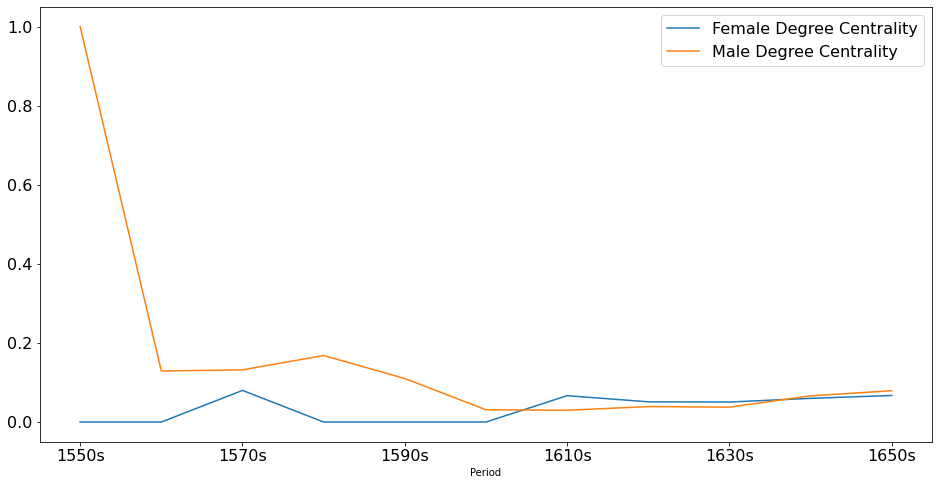

In [39]:
wvsm_plot = all_df.plot.line(figsize = (16, 8))
wvsm_plot.tick_params(axis='x', labelsize = 16)
wvsm_plot.tick_params(axis='y', labelsize = 16)
wvsm_plot.legend(fontsize = 16)

<AxesSubplot:xlabel='Period'>

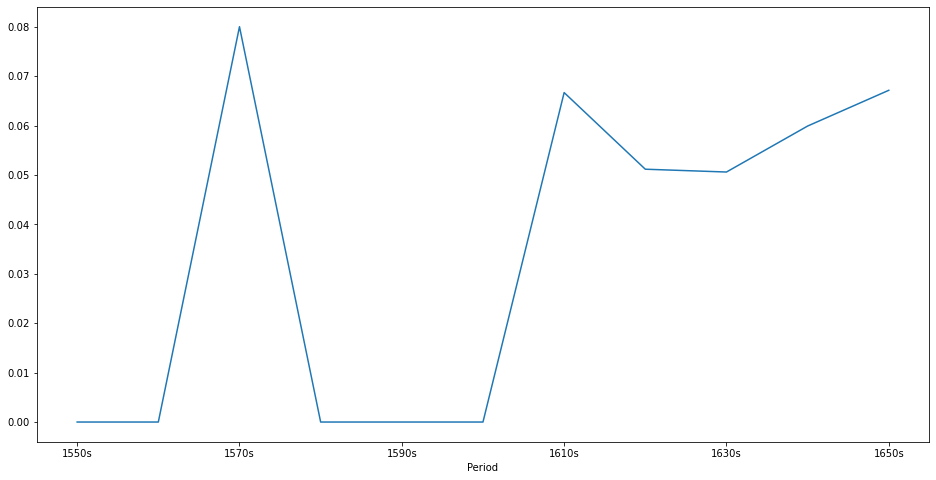

In [40]:
all_df['Female Degree Centrality'].plot.line(figsize = (16, 8))

In [41]:
# female_pp.to_csv('women_degrees.csv', index = False)

In [42]:
compare_df = pd.DataFrame()
cal_col = female_pp.columns[2:7]
female_cal = []
male_cal = []
for col in cal_col:
    female_cal.append(female_pp_compare[col].mean())
    male_cal.append(male_pp_compare[col].mean())
compare_df['Metrics'] = cal_col
compare_df['Female'] = female_cal
compare_df['Male'] = male_cal
compare_df = compare_df.set_index('Metrics')

In [43]:
compare_df.round(4)

,Female,Male
Metrics,,
Degree Centrality,0.0188,0.0128
Eigenvector,0.0277,0.0202
Clustering,0.2504,0.5222
Closeness,0.3327,0.2994
Betweenness,0.0144,0.0082


In [44]:
for col in cal_col:
    print(f'{col}: {ttest_ind([i for i in female_pp[col]], [i for i in male_pp_compare[col]])}')

Degree Centrality: Ttest_indResult(statistic=1.740952430883175, pvalue=0.084895710319211)
Eigenvector: Ttest_indResult(statistic=0.8636281792176107, pvalue=0.3899447946525151)
Clustering: Ttest_indResult(statistic=-2.216726848337133, pvalue=0.029002597555169964)
Closeness: Ttest_indResult(statistic=1.567077152741594, pvalue=0.12038713106638492)
Betweenness: Ttest_indResult(statistic=2.5679531239401654, pvalue=0.011772502535780712)
